In [ ]:
# Kaggle Link: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [ ]:
# Since I am running this notebook on  Colab, I will import data from Google Drive
# !unzip drive/MyDrive/Datasets/intel_img.zip

# Execution Steps:
Step 1: Import Libraries<br>
Step 2: Create Data Loader<br>
Step 3: Define Model<br>
Step 4: Train and Evaluate Model<br>

# Step 1: Import Libraries

In [ ]:
# Import
import numpy as np
from PIL import Image
import os

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16

# Step 2: Create Data Loader

In [ ]:
# Create Generator
image_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
# Create Data Loaders
train_loader = image_generator.flow_from_directory(
    directory = "seg_train/seg_train",
    target_size = (224, 224),
    batch_size = 50,
    shuffle = True
)

test_loader = image_generator.flow_from_directory(
    directory = "seg_test/seg_test",
    target_size = (224, 224),
    batch_size = 50,
    shuffle = True
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
idx_to_class = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_class

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

# Step 3: Define Model

In [ ]:
model = Sequential()
model.add(VGG16(include_top = False, pooling = "avg"))
model.add(Dense(6, activation = "softmax"))

In [ ]:
model.layers[0].trainable = False

# Step 4: Train and Evaluate Model

In [ ]:
# Train and Test Steps
steps_train = len(train_loader)    # = round(num_train_images / batch_size)
steps_test = len(test_loader)

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_train_history = model.fit_generator(
    generator = train_loader,
    steps_per_epoch = steps_train,
    epochs = 5,
    validation_data = test_loader,
    validation_steps = steps_test
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


281/281 [==============================] - 99s 352ms/step - loss: 0.9609 - accuracy: 0.7647 - val_loss: 0.4563 - val_accuracy: 0.8713
Epoch 2/5
281/281 [==============================] - 96s 343ms/step - loss: 0.3231 - accuracy: 0.8971 - val_loss: 0.3922 - val_accuracy: 0.8833
Epoch 3/5
281/281 [==============================] - 97s 344ms/step - loss: 0.2649 - accuracy: 0.9138 - val_loss: 0.3380 - val_accuracy: 0.8933
Epoch 4/5
281/281 [==============================] - 97s 344ms/step - loss: 0.2292 - accuracy: 0.9217 - val_loss: 0.3226 - val_accuracy: 0.8970
Epoch 5/5
281/281 [==============================] - 97s 344ms/step - loss: 0.2112 - accuracy: 0.9260 - val_loss: 0.3106 - val_accuracy: 0.9007


# Model Performance

In [ ]:
pred_img_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir("seg_pred/seg_pred")]

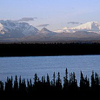

2
glacier


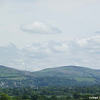

3
mountain


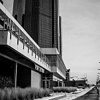

0
buildings


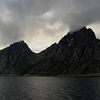

3
mountain


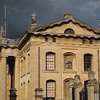

0
buildings


In [ ]:
import random
for i in range(5):
  num = random.randint(0, len(pred_img_list))
  img = Image.open(pred_img_list[num])
  display(img.resize((100,100)))
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = img_array[np.newaxis, :]
  prob = model(img_array)
  pred = np.argmax(prob)
  print(pred)
  print(idx_to_class[pred])
  print("=======================================")